In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import re


In [4]:
df = pd.read_csv(r'../../data/derived/Pleiades_df.csv')
roman_df = df[df['Title'].str.lower().str.contains('roman ')]
roman_df = roman_df[roman_df['Start_Date']<500.0] ### No roman places are created after 500 AD
roman_settlements = roman_df[roman_df['Place_Type'].str.lower().str.contains('settlement')]

Roman empire spans from around 30 BC to 480 AD with its height around 117 AD where it controlled all land from western europe to the middle east, one idea is to show how the 'tagged Roman' structures correlate with this information. Below I will try to plot the number of tagged places from 30 bc to 480AD

In [139]:
dates = np.arange(-100,480, 10)
no_roman_places = np.zeros_like(dates)
for i, date in enumerate(dates):
    no_roman_places[i] = len(roman_df[(roman_df['Start_Date']<=date) & (roman_df['End_Date']>=date)])


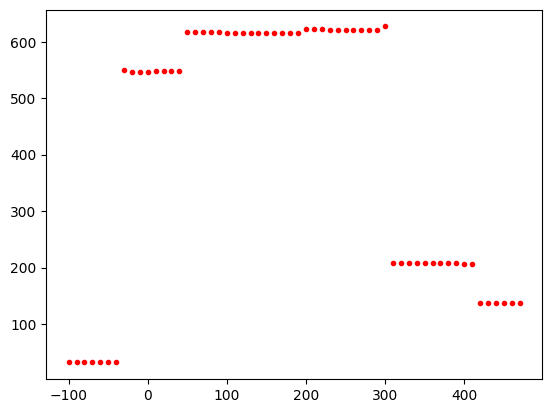

In [140]:
plt.plot(dates, no_roman_places, 'r.')

In [32]:
lons_117AD = roman_df[(roman_df['Start_Date']<=117) & (roman_df['End_Date']>=117)]['long']
lats_117AD = roman_df[(roman_df['Start_Date']<=117) & (roman_df['End_Date']>=117)]['lat']
lons_480AD = roman_df[(roman_df['Start_Date']<=480) & (roman_df['End_Date']>=480)]['long']
lats_480AD = roman_df[(roman_df['Start_Date']<=480) & (roman_df['End_Date']>=480)]['lat']

c:\Users\Joe\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Joe\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


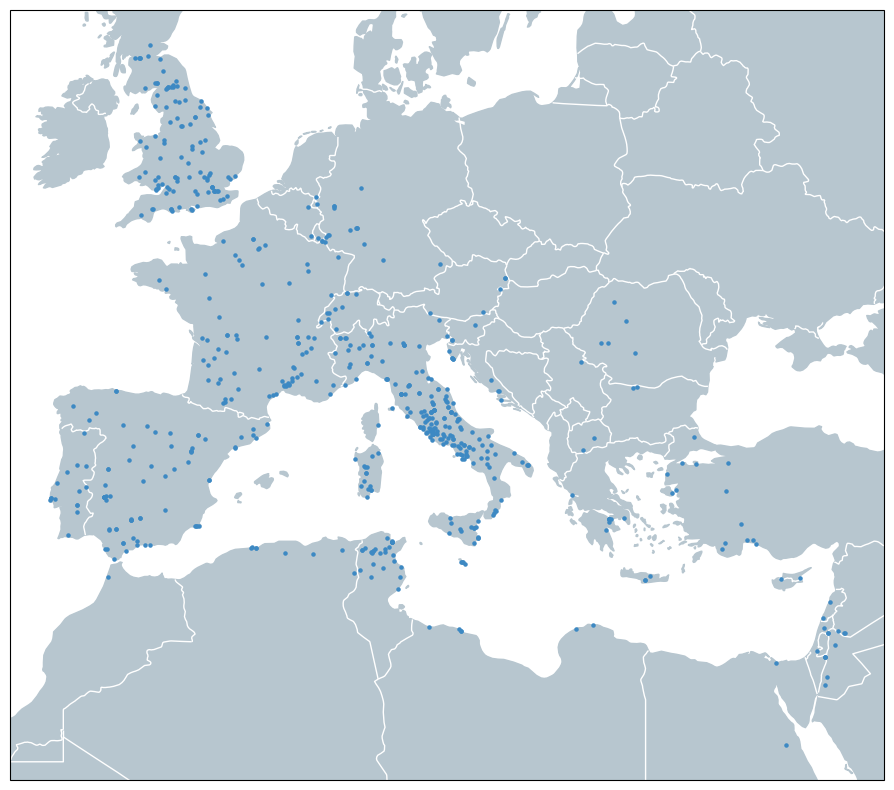

In [136]:
#### THINGS TO DO
## ADD MAJOR CITY NAMES



plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.Mercator()) ## CAN change type of projection

# ax.set_extent([-10, 42, 57, 25], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color = '#B7C6CF', zorder = 1)
ax.add_feature(cfeature.BORDERS, color = 'white', zorder = 2)


ax.scatter(lons_117AD, lats_117AD, s=5 , c ='#3D89C3' ,transform=ccrs.PlateCarree(), alpha = 1, zorder = 3)
# ax.plot(lons_480AD, lats_480AD, '.' ,transform=ccrs.PlateCarree(),c ='#C7303C', alpha = 1)


# Show the plot
plt.show()

c:\Users\Joe\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


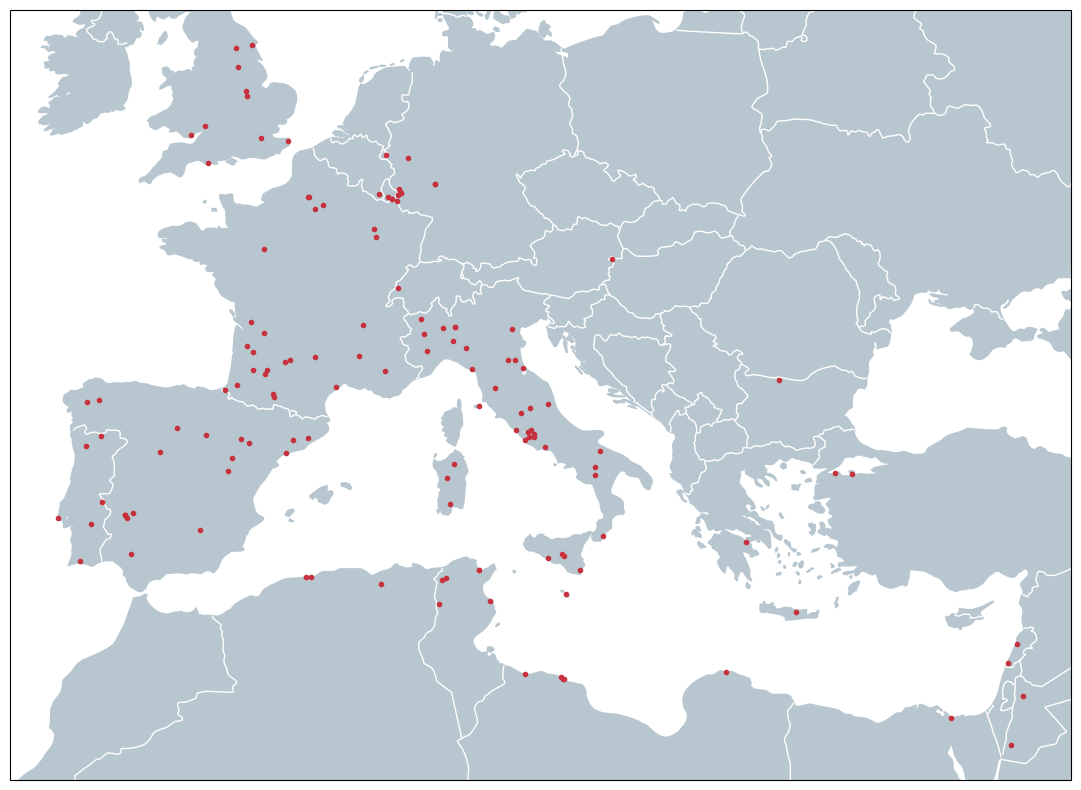

In [113]:
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.Mercator()) ## CAN change type of projection

# ax.set_extent([-10, 42, 57, 25], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color = '#B7C6CF')
ax.add_feature(cfeature.BORDERS, color = 'white')

# ax.plot(lons_117AD, lats_117AD, '.',c ='#3D89C3' ,transform=ccrs.PlateCarree(), alpha = 1)
ax.plot(lons_480AD, lats_480AD, '.' ,transform=ccrs.PlateCarree(),c ='#C7303C', alpha = 1)



# Show the plot
plt.show()

c:\Users\Joe\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Joe\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


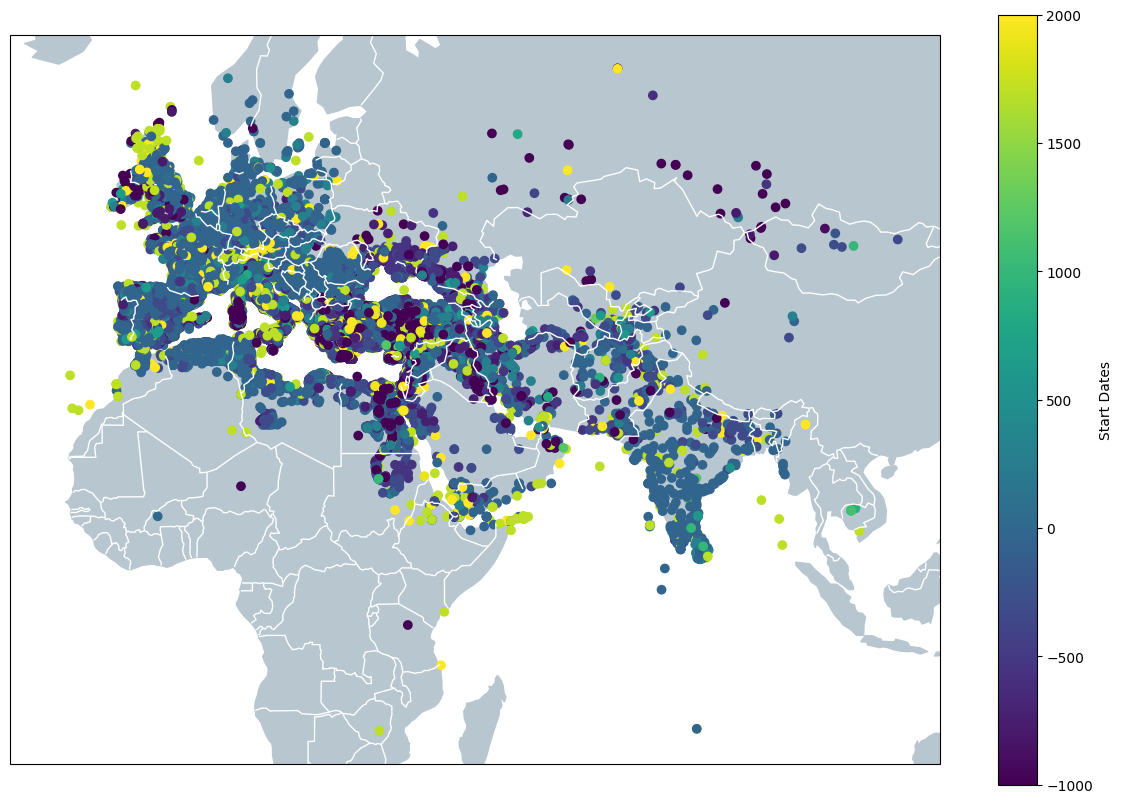

In [127]:
## PLOT EVERYTHING

plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.Mercator()) ## CAN change type of projection

# ax.set_extent([-10, 42, 57, 25], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color = '#B7C6CF')
ax.add_feature(cfeature.BORDERS, color = 'white')

start_dates = df['Start_Date']
truncated_start_dates = [max(value, -1000) for value in start_dates]

sc = ax.scatter(df['long'], df['lat'], c=truncated_start_dates, cmap='viridis' ,transform=ccrs.PlateCarree(), alpha = 1)

plt.colorbar(sc, label='Start Dates')
# Show the plot
plt.show()